In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('log_transformed_data.csv',
               index_col = 0)

In [3]:
df

,NA_Sales_log,EU_Sales_log,JP_Sales_log,Other_Sales_log,rank,rate,Gobal_Sales_log
0,2.243896,-0.916291,-0.891598,2.358020,18,9.4,3.035434
1,0.231112,-0.494296,-inf,-2.407946,875,9.4,0.667829
2,-inf,-0.083382,-inf,-2.995732,2122,9.4,-0.020203
3,-2.525729,-3.506558,-inf,-4.605170,9829,9.4,-2.120264
4,1.947338,2.226783,-0.030459,1.420696,17,9.5,3.063391
...,...,...,...,...,...,...,...
653,-1.897120,-3.218876,-inf,-4.605170,7718,8.6,-1.609438
654,0.364643,0.009950,-0.562119,-1.203973,405,8.1,1.202972
655,-1.514128,-1.386294,-3.218876,-2.407946,3352,8.3,-0.510826
656,-1.309333,-1.897120,-3.218876,-3.218876,3956,8.3,-0.693147


## simple exploratory data analysis(EDA)

In [4]:
df.describe()

C:\Users\modi_\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,NA_Sales_log,EU_Sales_log,JP_Sales_log,Other_Sales_log,rank,rate,Gobal_Sales_log
count,658.000000,658.000000,658.000000,658.000000,658.000000,652.000000,658.000000
mean,-inf,-inf,-inf,-inf,3775.724924,8.149847,-0.205618
std,NaN,NaN,NaN,NaN,3914.957989,0.896357,1.463833
min,-inf,-inf,-inf,-inf,2.000000,3.100000,-4.605170
25%,-2.021694,-2.407946,NaN,-3.810657,688.250000,7.800000,-1.139434
50%,-0.843970,-1.220924,NaN,-2.466837,2355.000000,8.200000,-0.122184
75%,0.163387,-0.201518,-3.218876,-1.386294,5605.250000,8.700000,0.836163
max,3.370051,2.226783,1.918392,2.358020,16375.000000,9.700000,3.694862


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 0 to 657
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NA_Sales_log     658 non-null    float64
 1   EU_Sales_log     658 non-null    float64
 2   JP_Sales_log     658 non-null    float64
 3   Other_Sales_log  658 non-null    float64
 4   rank             658 non-null    int64  
 5   rate             652 non-null    float64
 6   Gobal_Sales_log  658 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 41.1 KB


In [6]:
cols = ['NA_Sales_log','EU_Sales_log','JP_Sales_log','Other_Sales_log','Gobal_Sales_log']

df[cols] = df[cols].applymap(' {:,.4f}'.format)


In [7]:
df


,NA_Sales_log,EU_Sales_log,JP_Sales_log,Other_Sales_log,rank,rate,Gobal_Sales_log
0,2.2439,-0.9163,-0.8916,2.3580,18,9.4,3.0354
1,0.2311,-0.4943,-inf,-2.4079,875,9.4,0.6678
2,-inf,-0.0834,-inf,-2.9957,2122,9.4,-0.0202
3,-2.5257,-3.5066,-inf,-4.6052,9829,9.4,-2.1203
4,1.9473,2.2268,-0.0305,1.4207,17,9.5,3.0634
...,...,...,...,...,...,...,...
653,-1.8971,-3.2189,-inf,-4.6052,7718,8.6,-1.6094
654,0.3646,0.0100,-0.5621,-1.2040,405,8.1,1.2030
655,-1.5141,-1.3863,-3.2189,-2.4079,3352,8.3,-0.5108
656,-1.3093,-1.8971,-3.2189,-3.2189,3956,8.3,-0.6931


In [8]:
df.isna().sum()

NA_Sales_log       0
EU_Sales_log       0
JP_Sales_log       0
Other_Sales_log    0
rank               0
rate               6
Gobal_Sales_log    0
dtype: int64

In [9]:
#df.dropna(inplace=True)
#df = df.fillna(df.mean())

In [10]:
df['NA_Sales_log'] = pd.to_numeric(df['NA_Sales_log'], errors='coerce')
df['EU_Sales_log'] = pd.to_numeric(df['EU_Sales_log'], errors='coerce')
df['JP_Sales_log'] = pd.to_numeric(df['JP_Sales_log'], errors='coerce')
df['Other_Sales_log'] = pd.to_numeric(df['Other_Sales_log'], errors='coerce')
df['Gobal_Sales_log'] = pd.to_numeric(df['Gobal_Sales_log'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 0 to 657
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NA_Sales_log     621 non-null    float64
 1   EU_Sales_log     634 non-null    float64
 2   JP_Sales_log     275 non-null    float64
 3   Other_Sales_log  608 non-null    float64
 4   rank             658 non-null    int64  
 5   rate             652 non-null    float64
 6   Gobal_Sales_log  658 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 41.1 KB


In [12]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

NA_Sales_log - 6%
EU_Sales_log - 4%
JP_Sales_log - 58%
Other_Sales_log - 8%
rank - 0%
rate - 1%
Gobal_Sales_log - 0%


In [13]:
inf = df[ df['NA_Sales_log'] == '-inf'].index
df.drop(inf, inplace = True)

In [14]:
df

,NA_Sales_log,EU_Sales_log,JP_Sales_log,Other_Sales_log,rank,rate,Gobal_Sales_log
0,2.2439,-0.9163,-0.8916,2.3580,18,9.4,3.0354
1,0.2311,-0.4943,NaN,-2.4079,875,9.4,0.6678
2,NaN,-0.0834,NaN,-2.9957,2122,9.4,-0.0202
3,-2.5257,-3.5066,NaN,-4.6052,9829,9.4,-2.1203
4,1.9473,2.2268,-0.0305,1.4207,17,9.5,3.0634
...,...,...,...,...,...,...,...
653,-1.8971,-3.2189,NaN,-4.6052,7718,8.6,-1.6094
654,0.3646,0.0100,-0.5621,-1.2040,405,8.1,1.2030
655,-1.5141,-1.3863,-3.2189,-2.4079,3352,8.3,-0.5108
656,-1.3093,-1.8971,-3.2189,-3.2189,3956,8.3,-0.6931


## Visualization Data


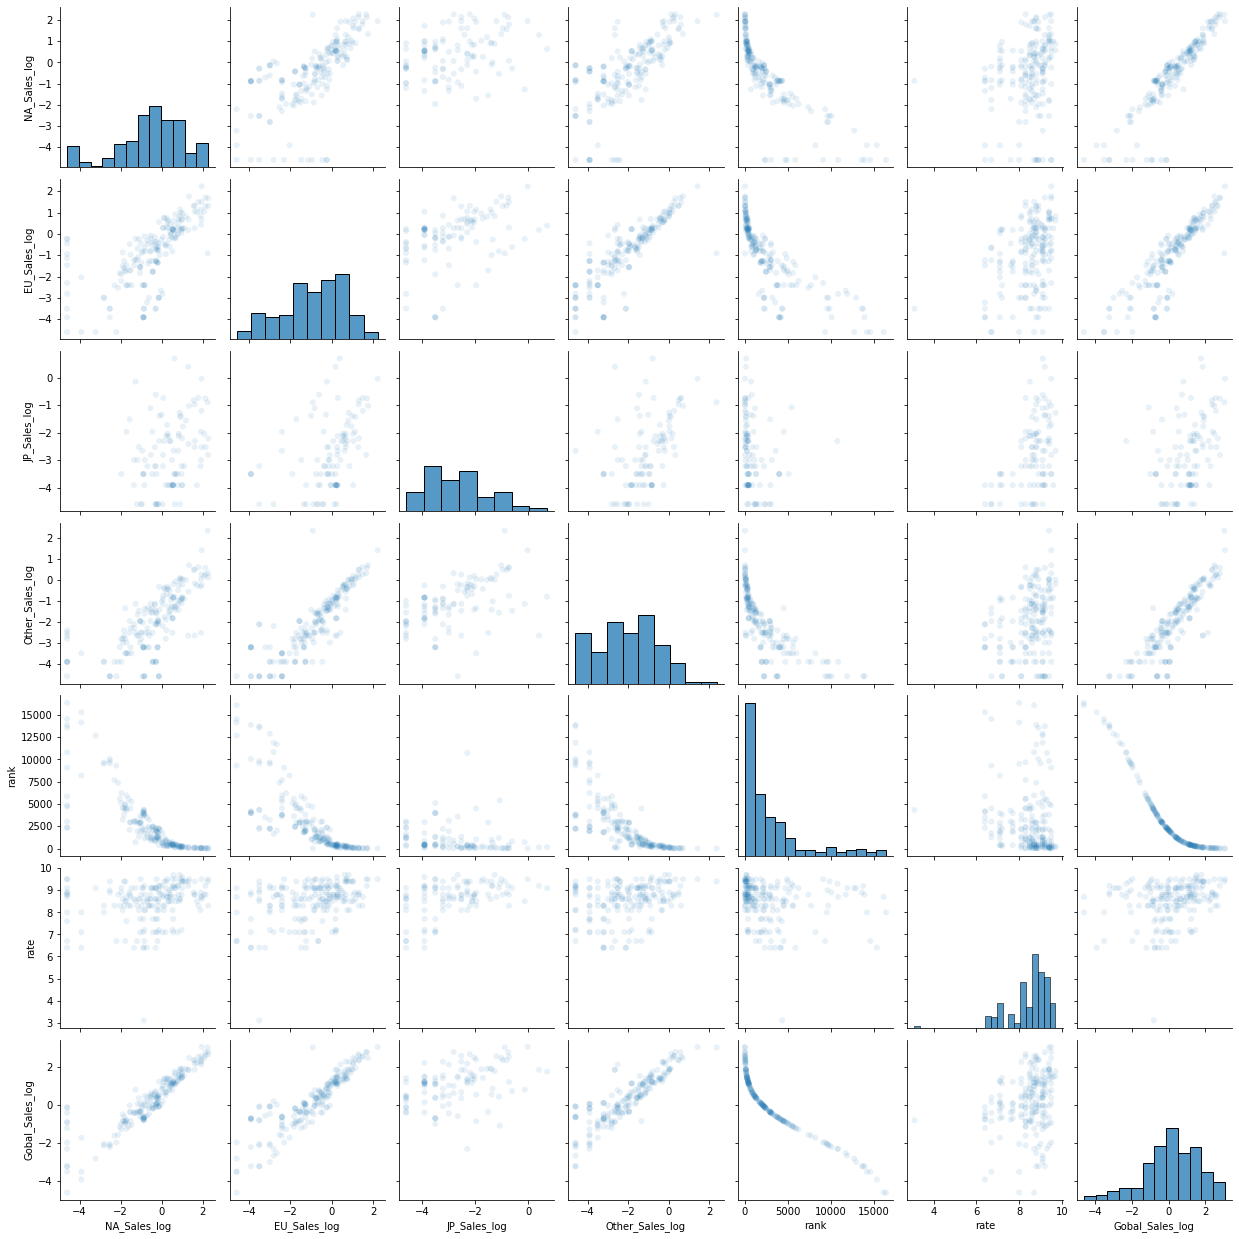

In [15]:
sns.pairplot(df[:200], plot_kws=dict(alpha=.1, edgecolor='none'))

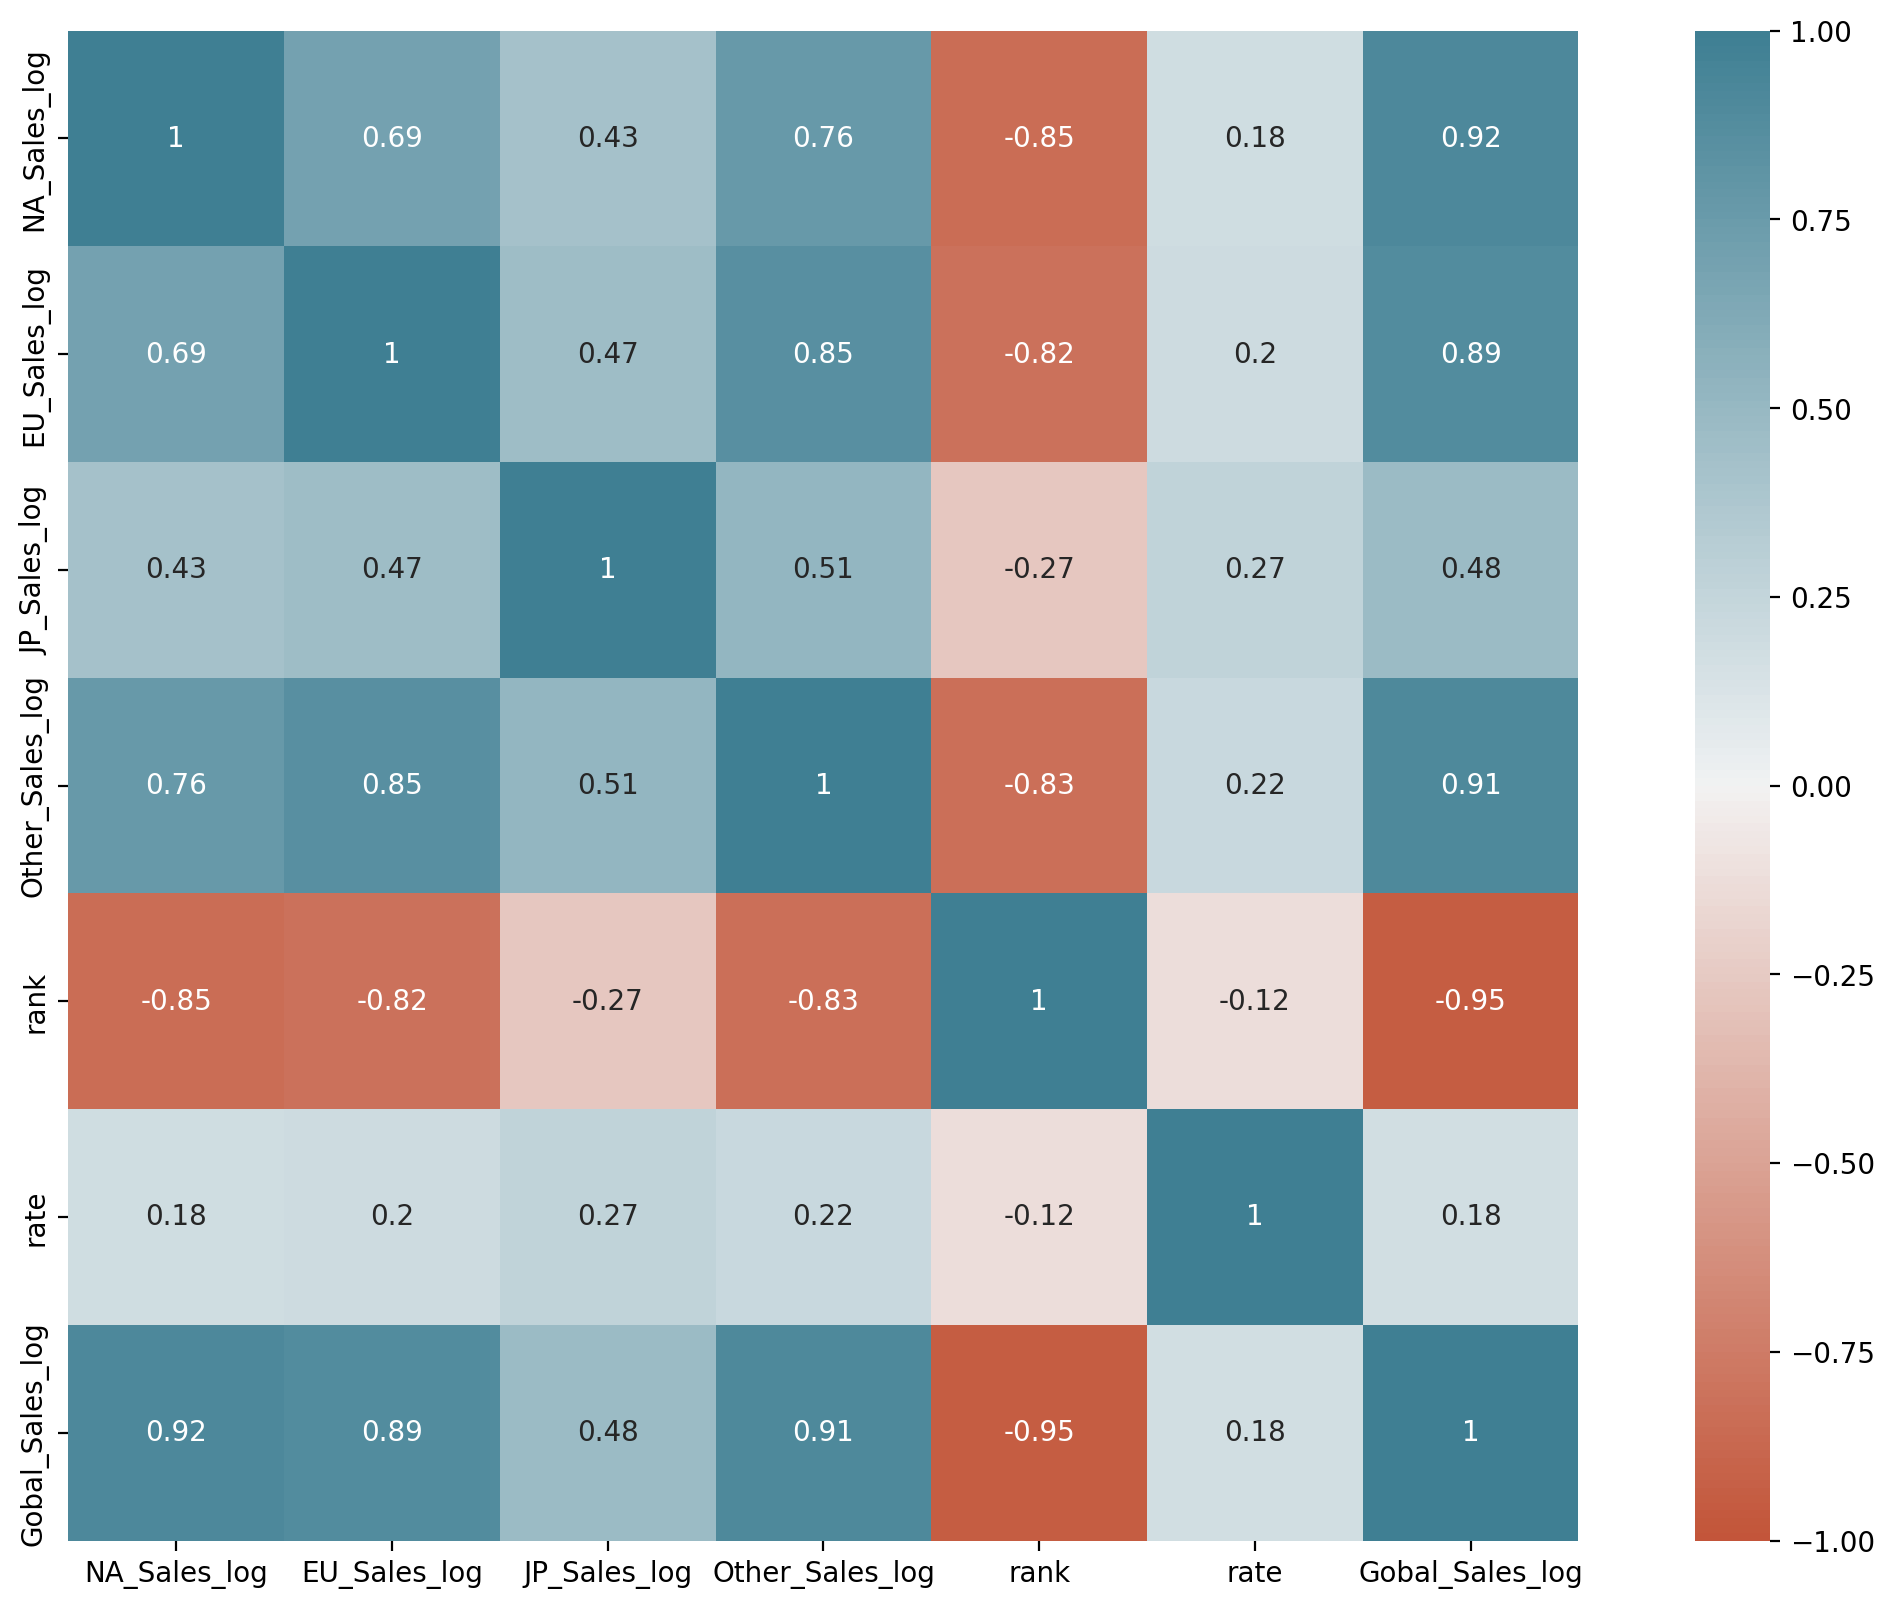

In [16]:
plt.figure(figsize=(15,10),dpi=200),
sns.heatmap(df.corr(),square=True, annot=True, vmin=-1, vmax=1,cmap=sns.diverging_palette(20, 220, n=200),);


# linear regression

### determine the features and target

In [17]:
col=['NA_Sales_log','EU_Sales_log','JP_Sales_log','Other_Sales_log','rank','rate']
x=df[col].fillna(df.mean())
y =df.Gobal_Sales_log

### split data to train and val and test

In [18]:
# hold out 20% of the data for final testing
x, X_test, y, y_test = train_test_split(x, y, test_size=.20, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=.20, random_state=0)

In [19]:
print("Training Data has",X_train.shape)
print('Test Data has',X_test.shape)
print("Validation Data has",X_val.shape)

Training Data has (420, 6)
Test Data has (132, 6)
Validation Data has (106, 6)


# baseline model

In [20]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'linear regression train R^2: {lm.score(X_train, y_train):.3f}')
lm.fit(X_val,y_val)
print(f'linear Regression val R^2: {lm.score(X_val, y_val):.3f}')


linear regression train R^2: 0.967
linear Regression val R^2: 0.973


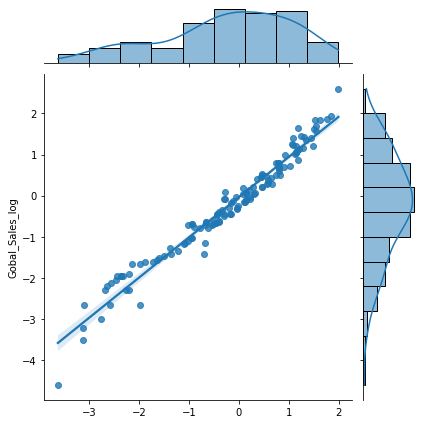

In [21]:
lm.fit(X_train, y_train)
preds = lm.predict(X_test)
sns.jointplot(x=preds,y=y_test, kind='reg')


In [22]:
lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

scalermin_max = MinMaxScaler()

X_train_SMM = scalermin_max.fit_transform(X_train.values)
X_val_SMM = scalermin_max.transform(X_val.values)
X_test_SMM = scalermin_max.transform(X_test.values)
 
lm_MM = LinearRegression()    
    
#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()


# Model 1: (Standered Scale model)

In [23]:
lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression train R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')
lm_reg.fit(X_val_scaled,y_val)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')



Ridge Regression train R^2: 0.967
Ridge Regression val R^2: 0.973


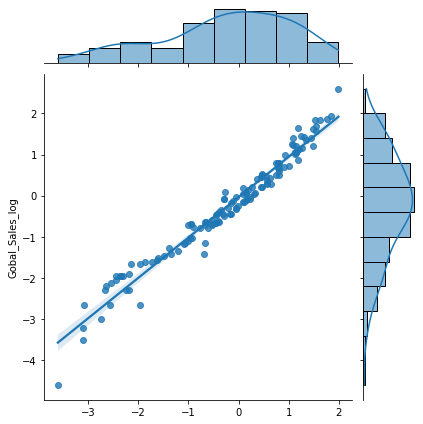

In [24]:
lm_reg.fit(X_train_scaled, y_train)
preds = lm_reg.predict(X_test_scaled)
sns.jointplot(x=preds,y=y_test, kind='reg')

# Model 2: (MinMax Scale model)

In [25]:

lm_MM.fit(X_train_SMM, y_train)
print(f'minmax scaler Regression train R^2: {lm_MM.score(X_train_SMM, y_train):.3f}')
lm_MM.fit(X_val_SMM,y_val)
print(f'minmax scaler Regression val R^2: {lm_MM.score(X_val_SMM, y_val):.3f}')



minmax scaler Regression train R^2: 0.967
minmax scaler Regression val R^2: 0.973


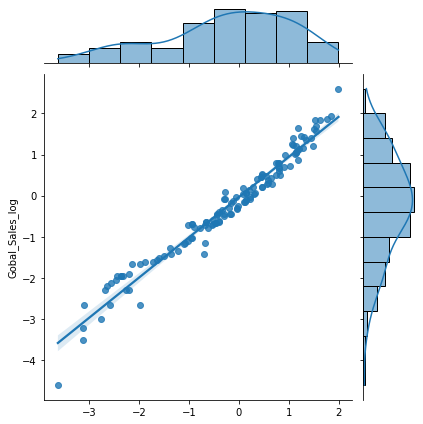

In [26]:
lm_MM.fit(X_train_SMM, y_train)
preds = lm_MM.predict(X_test_SMM)
sns.jointplot(x=preds,y=y_test, kind='reg')

# Model 3: (polynomial model)

In [27]:
#exp2 (poly on X)
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
lm_poly.fit(X_val_poly,y_val)
print(f'Degree Regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')


Degree 2 polynomial regression train R^2: 0.997
Degree Regression val R^2: 0.997


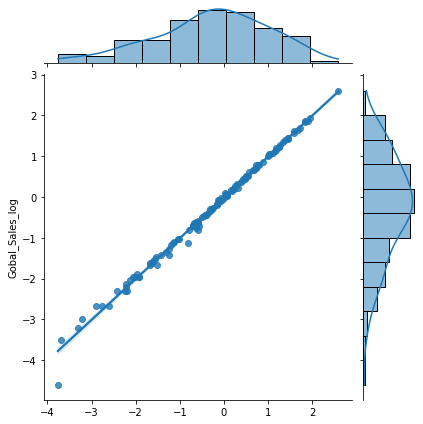

In [28]:

lm_poly.fit(X_train_poly, y_train)
preds = lm_poly.predict(X_test_poly)
sns.jointplot(x=preds,y=y_test, kind='reg')

## beast model (polynomial model)

In [29]:
model = sm.OLS(y_train,X_train_poly)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Gobal_Sales_log   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     5313.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:28:59   Log-Likelihood:                 467.29
No. Observations:                 420   AIC:                            -878.6
Df Residuals:                     392   BIC:                            -765.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5825      0.223      7.081      0.000       1.143       2.022
x1             0.3045      0.054      5.615      0.000       0.198       0.411
x2             0.1866      0.058      3.204      0.001       0.072       0.301
x3             0.2135      0.073      2.944      0.003       0.071       0.356
x4             0.1499      0.051      2.946      0.003       0.050       0.250
x5            -0.0003   2.89e-05    -10.109      0.000      -0.000      -0.000
x6            -0.0025      0.042     -0.060      0.952      -0.085       0.080
x7             0.0524      0.003     19.136      0.000       0.047       0.058
x8            -0.0732      0.010     -7.181      0.000      -0.093      -0.053
x9            -0.0116      0.008     -1.471      0.142      -0.027       0.004
x10           -0.0049      0.005     -0.931      0.353      -0.015       0.005
x11        -3.215e-05    3.1e-06    -10.362      0.000   -3.82e-05    -2.6e-05
x12            0.0077      0.006      1.380      0.168      -0.003       0.019
x13            0.0560      0.004     12.841      0.000       0.047       0.065
x14           -0.0274      0.009     -2.913      0.004      -0.046      -0.009
x15           -0.0180      0.007     -2.706      0.007      -0.031      -0.005
x16        -2.114e-05   3.37e-06     -6.267      0.000   -2.78e-05   -1.45e-05
x17            0.0060      0.006      1.045      0.297      -0.005       0.017
x18            0.0248      0.004      6.219      0.000       0.017       0.033
x19           -0.0179      0.009     -1.971      0.049      -0.036   -4.94e-05
x20        -3.172e-05   5.63e-06     -5.637      0.000   -4.28e-05   -2.07e-05
x21           -0.0055      0.007     -0.746      0.456      -0.020       0.009
x22            0.0256      0.005      5.312      0.000       0.016       0.035
x23        -1.207e-05      2e-06     -6.036      0.000    -1.6e-05   -8.14e-06
x24           -0.0002      0.005     -0.045      0.964      -0.010       0.010
x25        -1.451e-08   1.16e-09    -12.497      0.000   -1.68e-08   -1.22e-08
x26         5.054e-06   2.51e-06      2.010      0.045    1.11e-07       1e-05
x27           -0.0016      0.003     -0.596      0.552      -0.007       0.004
==============================================================================
Omnibus:                      119.138   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2448.345
Skew:                          -0.645   Prob(JB):                         0.00
Kurtosis:                      14.758   Cond. No.                     3.61e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+09. This might indi

###  evaluate model performance using  RMSE and MAE to determine errors


In [30]:
#Mean Absolute Error (MAE)
#def mae(y_true, y_pred):
#    return np.mean(np.abs(y_pred - y_true)) 

#mae(y_test, test_set_pred)#Mean Absolute Error (MAE)
#def mae(y_true, y_pred):
#    return np.mean(np.abs(y_pred - y_true)) 

#mae(y_test, test_set_pred)


In [31]:
y_pred = lm_poly.predict(X_test_poly)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y_pred, y_test, squared=False)
mae = mean_absolute_error(y_pred, y_test)
print(rmse)
print(mae)

0.09801557400075958
0.04625470409616432


## test the model to (unseen data)

In [33]:
# test the model to (unseen data)
lm.fit(X_test_poly,y_test)#X_test_poly???
lm.score(X_test_poly,y_test)#X_test_poly???

0.9976660873959178

In [34]:
# Calculate and print r2_score

y_pred=lm.predict(X_test_poly)
from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test,y_pred)))

R2 Score value: 0.9977


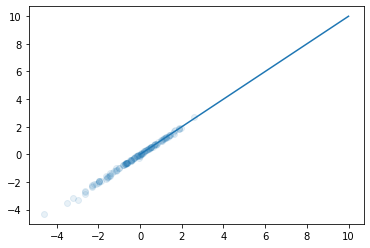

In [35]:
plt.scatter(y_test,y_pred, alpha=.10)
plt.plot(np.linspace(0,10,5), np.linspace(0,10,5))

 some points to do in feuter: we can use best model (poly) in lasso annd ridge to get more high scores!

## lasso and ridge 

### lasso

In [36]:

col=['NA_Sales_log','EU_Sales_log','JP_Sales_log','Other_Sales_log','rank','rate']
x = df[col].fillna(df.mean())
y = df.Gobal_Sales_log

In [37]:
# hold out 20% of the data for final testing
x, X_test, y, y_test = train_test_split(x, y, test_size=.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state= 0)

#### Scale features

In [38]:
from sklearn.preprocessing import StandardScaler
## Scale the data as before
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [39]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [40]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
lasso_model = Lasso(alpha = .001) # this is a VERY HIGH regularization strength!, wouldn't usually be used
lasso_model.fit(X_train.loc[:,col], y_train)

Lasso(alpha=0.001)

In [41]:
coef=lasso_model.coef_
list(zip(col, coef))

[('NA_Sales_log', 0.18848610910203295),
 ('EU_Sales_log', 0.18736383179810912),
 ('JP_Sales_log', 0.1404409709462015),
 ('Other_Sales_log', 0.10453025734430357),
 ('rank', -0.00022281442210701167),
 ('rate', 0.005062688083987481)]

In [42]:
#coef=lasso_model.coef_
#plt.plot(range(len(cols)),coef)
#plt.xticks(range(len(cols)),cols,rotation=60)
#plt.ylabel('coffecient')
#plt.show()

In [43]:
test_set_pred = lasso_model.predict(X_test.loc[:,col])

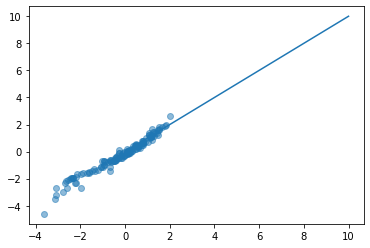

In [44]:
plt.scatter(test_set_pred, y_test, alpha=.5)
plt.plot(np.linspace(0,10,5), np.linspace(0,10,5))

In [45]:
#r-squared
r2_score(y_test, test_set_pred)

0.9614667715860915

In [46]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

0.1948659223832166

## ridge

In [47]:
lr_model_ridge = Ridge(alpha = 0.100000)
lr_model_ridge.fit(X_train, y_train)

list(zip(X_train.columns, lr_model_ridge.coef_))

[('NA_Sales_log', 0.18892294469838927),
 ('EU_Sales_log', 0.18797049553716683),
 ('JP_Sales_log', 0.14138733266023196),
 ('Other_Sales_log', 0.10461797952895459),
 ('rank', -0.00022244567947208476),
 ('rate', 0.006058568149415794)]

In [48]:
test_set_pred_r = lr_model_ridge.predict(X_test.loc[:,col])

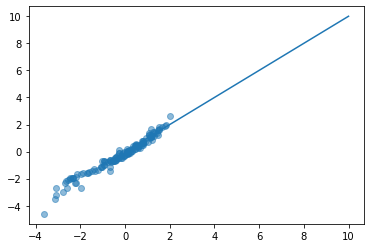

In [49]:
plt.scatter(test_set_pred_r, y_test, alpha=0.5)
plt.plot(np.linspace(0,10,5), np.linspace(0,10,5))

In [50]:
#r-squared
r2_score(y_test, test_set_pred_r)

0.9613291725291611

In [51]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred_r)#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred_r)

0.19500147365084747